# Plot Fama-French Portfolios returns

# Interactive graph

In [41]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd
from datetime import datetime


tooltips = [
            ('Date', "@index{%m-%d}"),
            ('Name', '@name'),
            ('Value', "@value")
           ]

hover = HoverTool(
        tooltips=[
            ('Time', '@time{%c}'),
            ('Name', '$name'),
            ('Returns', "$y")
            ],
        formatters={'@time': 'datetime'})

# prep data
dateparse = lambda x: datetime.strptime(x,'%Y%m') 

df = pd.read_csv('data/F-F_Research_Data_Factors.CSV', names=['time', 'Mkt-RF', 'SMB', 'HML', 'RF'], skiprows=882,
                index_col=0, parse_dates=True, date_parser=dateparse)

# prep the data for Bokeh
source = ColumnDataSource(df)

# used for displaying in jupyter
output_notebook()

# create a new plot and add data to it
p = figure(title="Fama-French Three-factor model", x_axis_label='time', y_axis_label='Returns', 
x_axis_type='datetime', tools=['xwheel_zoom', hover], active_scroll='xwheel_zoom')
p.sizing_mode = 'scale_width'
p.ygrid.grid_line_color = "black"

colors = ['royalblue', 'maroon', 'darkorange', 'magenta']
for index, line in enumerate(['Mkt-RF', 'SMB', 'HML', 'RF']):
    p.line(x='time', y=line, legend_label=line, source=source, color=colors[index], name=line)

show(p)

Loading BokehJS ...

# The same but static picture

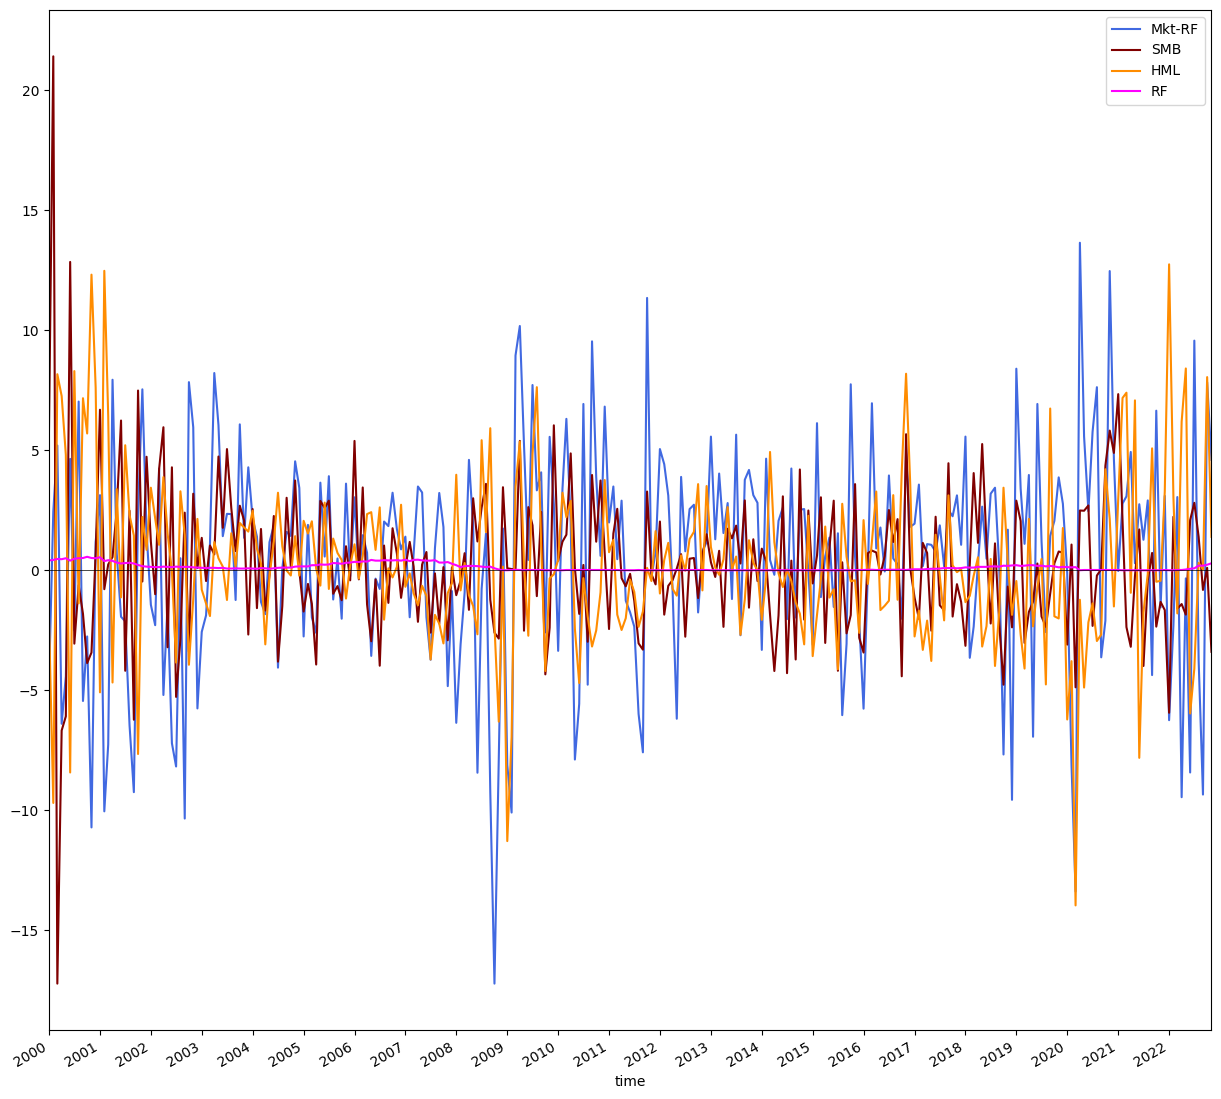

In [42]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

#
dateparse = lambda x: datetime.strptime(x,'%Y%m') 

df = pd.read_csv('data/F-F_Research_Data_Factors.CSV', names=['time', 'Mkt-RF', 'SMB', 'HML', 'RF'], skiprows=882,
                index_col=0, parse_dates=True, date_parser=dateparse)

pl = df.plot(figsize=(15,15), kind='line', x_compat=True, color = ['royalblue', 'maroon', 'darkorange', 'magenta'])
pl.xaxis.set_major_locator(mdates.YearLocator())


# remove empty years with no data
plt.margins(x=0)
# add x baseline
plt.axhline(y=0, color='black', linewidth=0.5)
# plt.xlim(df.index[0], df.index[-1])
plt.show()

